<a href="https://colab.research.google.com/github/V24039/Neural_Network_wine_dataset/blob/master/Neural_Network_Algorithm_using_housingprice_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

In [ ]:
def feed_forward(data_in, w0,w1,w2,w3,b):
  layer0 = data_in
  layer1 = sigmoid(np.dot(layer0,w0)+b)
  layer2 = sigmoid(np.dot(layer1,w1)+b)
  layer3 = sigmoid(np.dot(layer2,w2)+b)
  layer4 = np.dot(layer3, w3) +b

  return layer0,layer1,layer2,layer3,layer4

In [ ]:
def accuracy(xtest,ytest):
  correct=0
  layer0,layer1,layer2,layer3,layer4=feed_forward(xtest,w0,w1,w2,w3,b)
  for i in range(len(xtest)):
    if np.argmax(layer4[i])==np.argmax(ytest[i]):
      correct+=1
  return f"Accuracy: {(correct/len(ytest))*100}"

In [ ]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):
    
    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3  - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)
            #print(w3)
        
    return w0, w1,w2,w3,b

In [ ]:
d = pd.read_csv('housepricedata.csv')
d = (d-d.min())/ (d.max()- d.min())
x = np.array(d.iloc[:,:-1])
y = np.array(d.iloc[:,-1])
y = y.reshape(len(y), 1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [ ]:
w0 = np.random.random((10,50))
w1 = np.random.random((50,30))
w2 = np.random.random((30,5))
w3 = np.random.random((5,1))
b = np.random.random((1,1))
epochs = 10000

In [ ]:
loss_curve = []
iters = []

In [ ]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.01 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  



 1000 0.25000570066725214

 2000 0.24999904258946326

 3000 0.24999904258945088

 4000 0.24999904258945083

 5000 0.24999904258945083

 6000 0.24999904258945083

 7000 0.24999904258945083

 8000 0.24999904258945083

 9000 0.24999904258945083



In [ ]:
layer0,layer1,layer2,layer3,layer4 = feed_forward(xtest,w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest,2))
loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.2500143611582369

In [ ]:
acc=accuracy(xtest,ytest)
print(acc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


IndexError: ignored

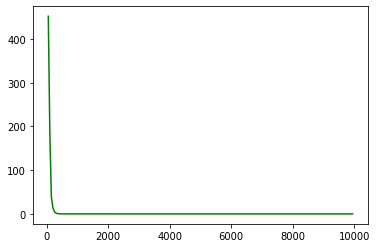

In [ ]:
plt.plot(iters,loss_curve, 'g-')